# 图像基本操作

# 1.计算机眼中的图像

① 在计算机眼中，Lena 这个人的图像被分成很多很多个小方格。

② 每一个小格叫做一个像素点，计算机就是由这些像素点组成一张图像的。

③ 每一个像素点有 RGB 三个通道，每个通道的值在 0-255 之间，0 表示黑的，255 表示非常亮。

④ 图像长宽有多少个像素，RGB 矩阵就有多大。

![title](lena_img.png)

① RGB 叫图像的颜色通道，通常情况下，我们看到的一个彩色图都是 RGB 三颜色通道的。

② 灰度图(或黑白图)只用一个通道来表示它的亮度就足够了。

③ RGB 矩阵的大小和图像的大小一样，若图像的像素点宽 500 长 500，则得到 [500,500,3] 的矩阵，这里的 3 就是 3 通道。

## 1.1数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [1]:
import cv2 #opencv读取的顺序是B G R  opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np # numpy数值计算工具包


# 魔法指令，直接展示图，Jupyter notebook 特有
%matplotlib inline  

img=cv2.imread('cat.jpg') # 读取图片

In [2]:
print(type(img)) # img 的类型为 numpy.ndarray 类型

<class 'numpy.ndarray'>


In [3]:
img  # uint8 的取值范围在 0-255 之间

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

# 2. 图像显示

## 2.1 图像显示(普通方法)

In [4]:
# opencv 默认读取格式是 BGR 格式，matplotlib 或其他库的读取格式可能是 RGB 的
# opencv 读取并用 opencv 自带的展示函数不需要进行通道转换，但 opencv 读取后用其他库展示图片需要通道转换    

# 图像显示时,可以创建多个窗口

# 第一个入口参数为展示图像窗口的名字
# 第二个入口参数为展示图像窗口中所展示的图像
cv2.imshow('image_cat',img)  

# 等待时间，毫秒级，0表示按任意键终止，5000ms表示5s,5s后自动消失
cv2.waitKey(5000)  

# 销毁图像窗口
cv2.destroyAllWindows()

## 2.2 图像显示(函数方法)

In [5]:
# 绘图显示(封装函数)
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

# 3.灰度图处理与图片保存

## 3.1读取BGR图(默认读取)

In [6]:
img=cv2.imread('cat.jpg')
img.shape# (h,w,c) c表示 3 通道，这个 3 通道被 opencv 读进来是 BGR 的先后顺序的 3 通道    

(414, 500, 3)

## 3.2 读取灰度图(设置读取)

In [7]:
img_gray=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE) # 读灰度图
#img_gray = cv2.imread('cat.jpg',,cv2.IMREAD_COLOR)  # 读BGR图
img_gray

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [8]:
print('type(img_gray):',type(img_gray))
print('img_gray.size: ',img_gray.size)  # 414 × 500 = 20700
print('img_gray.dtype:',img_gray.dtype)
print('img_gray.shape:',img_gray.shape) # 只有一个通道

type(img_gray): <class 'numpy.ndarray'>
img_gray.size:  207000
img_gray.dtype: uint8
img_gray.shape: (414, 500)


## 3.3显示图片

In [9]:
cv_show('image_cat_gray',img_gray)

## 3.4保持图片

In [10]:
cv2.imwrite('mycat_gray.png',img_gray) # 保存图片

True

## 3.5HSV颜色空间

HSV 颜色空间为：

H - 色调(主波长)。

S - 饱和度(纯度/颜色的阴影)。

V - 强度。

具体参见链接：https://zhuanlan.zhihu.com/p/105886300

In [11]:
hsv = cv2.imread('cat.jpg') # 读取图片
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV) # RGB到HSV转换
cv2.imshow('hsv',hsv) # 显示图片
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4.数据读取-视频

## 4.1视频转图片

① cv2.VideoCapture 函数可以捕获摄像头，或读取视频文件。

② cv2.VideoCapture 函数入口参数：

 - 用数字来控制不同的设备(摄像头)，例如 0、1。
 - 如果是视频文件，直接指定好路径即可。

In [12]:
vc = cv2.VideoCapture('test.mp4')

In [13]:
if vc.isOpened():   # 检查是否打开正确
    open, frame = vc.read() # 这里的 vc.read() 相当于读取图像的第一帧
                            # 若循环不断的执行 vc.read，则不断的读取第二帧、第三帧....
    print(open) # 正常打开时，open会返回 True
    cv_show('image_scenery',frame)
else:
    open = False

True


## 4.2图片转视频

In [14]:
while open: # 如果正常打开，则不停循环读取,这里可替换成 i 值，来确定读取 i 帧     
    ret, frame = vc.read()
    if frame is None: # 视频读完以后的下一帧为空
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 读取的图片转换成黑白的   
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF == 27: # cv2.waitKey(10)为等多少时间执行下一帧，0xFF为退出键ESC
            break
vc.release() # release()完成与 open() 相反的工作.释放 open() 向内核申请的所有资源
cv2.destroyAllWindows() # 销毁所有窗口

# 5.ROI区域

## 5.1截取部分图像数据

In [15]:
img=cv2.imread('cat.jpg')
cat=img[0:50,0:200] # 选择图片感兴趣的区域，类似于切割
cv_show('cat',cat)

## 5.2颜色通道提取

### 分离BGR通道

In [16]:
b,g,r = cv2.split(img)
cv_show('cat_b',b)
print('b.shape:',b.shape) # B通道，单通道，灰度图
cv_show('cat_g',g)
print('g.shape:',g.shape) # G通道，单通道，灰度图
cv_show('cat_r',r)
print('r.shape:',r.shape) # R通道，单通道，灰度图
img = cv2.merge((b,g,r))
print('img.shape:',img.shape) # 3 通道，彩色图

b.shape: (414, 500)
g.shape: (414, 500)
r.shape: (414, 500)
img.shape: (414, 500, 3)


In [17]:
r # 显示r的数值

array([[160, 164, 170, ..., 185, 184, 183],
       [126, 131, 137, ..., 184, 183, 182],
       [127, 131, 138, ..., 183, 182, 181],
       ...,
       [198, 193, 178, ..., 206, 195, 174],
       [176, 183, 175, ..., 188, 144, 125],
       [190, 190, 157, ..., 200, 145, 144]], dtype=uint8)

### 显示R通道

In [18]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0 # 0->B通道 使其为零
cur_img[:,:,1] = 0 # 1->G通道 使其为零
cv_show('R',cur_img)



### 显示G通道

In [19]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0 # 0->B通道 使其为零
cur_img[:,:,2] = 0 # 2->R通道 使其为零
cv_show('G',cur_img)

### 显示R通道

In [20]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0 # 1->G通道 使其为零
cur_img[:,:,2] = 0 # 2->R通道 使其为零
cv_show('B',cur_img)

# 6.边界填充

## 6.1边界填充简介

① 边界填充就是对图像进行一些变换，让原始图像进行扩大。

② 边界填充的入口参数：
- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

In [21]:
img = cv2.imread('cat.jpg')

top_size,bottom_size,left_size,right_size = (50,50,50,50) # 上下左右均填充宽50的区域

# 最后一个参数为填充方式

# 方式一：复制法
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE) 
# 方式二：反射法
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)
# 方式三：反射法二(不要最边缘的像素)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)      
# 方式四：外包装法
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
# 方式五：常量法
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)

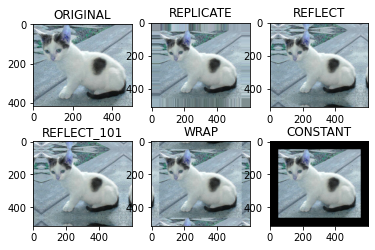

In [22]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

## 6.2数值计算

In [23]:
img_cat=cv2.imread('cat.jpg')
img_dog=cv2.imread('dog.jpg')

In [24]:
img_cat2= img_cat +10 # 将 img_cat 矩阵中每一个值都加 10
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [25]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [26]:
#相当于% 256 
# 0-255 若相加越界后 294 用 294%256 获得余数 38    
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [27]:
cv2.add(img_cat,img_cat2)[:5,:,0] # cv2.add 是越界后取最大值 255

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# 7.图像融合

## 7.1图像变换

In [28]:
img_cat + img_dog # 不同数据大小不能执行数值计算操作

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [29]:
print(img_cat.shape)
print(img_dog.shape)

(414, 500, 3)
(429, 499, 3)


In [30]:
img_dog = cv2.resize(img_dog, (500, 414)) # 改变大小
img_dog.shape

(414, 500, 3)

## 7.2图像融合 

In [31]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0) # img_cat 的权重为 0.4，img_dog 的权重为 0.6 

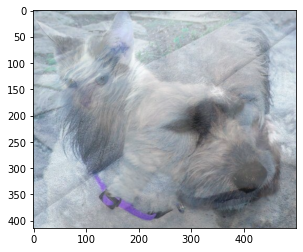

In [32]:
plt.imshow(res)

## 7.3 图像缩放 

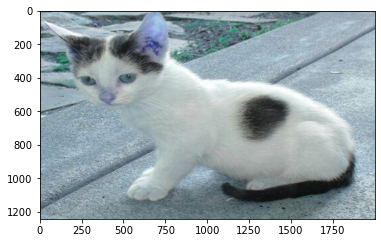

In [33]:
res = cv2.resize(img, (0, 0), fx=4, fy=3) # (0,0)表示不确定具体值，fx=4 相当于行像素 x 乘 4，fy=3 相当于 y 乘 3   
plt.imshow(res)

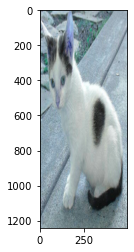

In [34]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)